In [1]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Changing the parent path
src_path = os.path.abspath(os.path.join('..', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)


from utils import *

## Loading the data

In [2]:
data = readDataset()
data.head(4)

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."


## Performing Data Cleaning Process

In [3]:
data = dataCleaning( data )

Applying Text Processing and Data Cleaning!


In [4]:
data.tail(10)

,stars,text,cleaned_text,sentiment
18172,4,"I make mine just like this, but use cream chee...",make mine like use cream cheese instead butter...,1
18173,5,My daughter and I have both requested it for o...,daughter request birthday mine june use fresh ...,1
18174,3,Family didn&#39;t care for it. I thought it w...,family didnt care think okay wont make,0
18175,4,I tried this recipe for the first time. I use...,try recipe first time use egg white rather egg...,1
18176,5,This cake has a really good taste. I made mine...,cake really good taste make mine x pan bake mi...,1
18177,5,This Strawberry Cake has been a family favorit...,strawberry cake family favorite since past sev...,1
18178,5,<p>I received endless compliments on this cake...,receive endless compliment cake use firmer str...,1
18179,5,This cake was delicious and so moist! I didn&#...,cake delicious moist didnt need sugar call fro...,1
18180,5,I just made this too. It is wonderful. As fo...,make wonderful frost wish make thicker tad mes...,1
18181,5,"OMG, you must make this cake. I made it for my...",omg must make cake make strawberrycrazy daught...,1


## Displaying Class Distribution

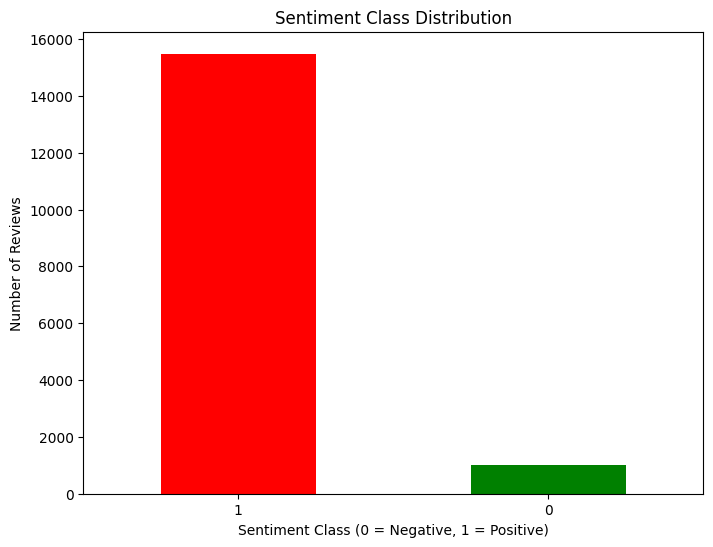

In [5]:
displayRatings( data['sentiment'] )

## Performing Data Preprocessing

In [8]:
XData = data['cleaned_text']
XLabels = data['sentiment']

X_train, X_test, y_train, y_test, tfidfVectorizer = tfidfVectorizationProcess( XData , XLabels )
xAdasynData, yAdasynData = adasynAlgo( X_train, y_train )

Shape After Vectorization! 
(13187, 396) (3297, 396) (13187,) (3297,)
Original shape: (13187, 396), Resampled shape: (23734, 396)
Original class distribution: Counter({1: 12387, 0: 800})
Resampled class distribution: Counter({1: 12387, 0: 11347})


## Running Machine Learning Models

In [9]:
logisticRegressionModel , lightGBMModel = runModels( xAdasynData, yAdasynData, X_test, y_test )

Mean F1-Score: 0.8980
Standard Deviation of F1-Score: 0.0039
 ** Model has Trained! ** 
***TESTING WEIGHTS:  {0: 2.0, 1: 1.0}
[LightGBM] [Info] Number of positive: 9909, number of negative: 9078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59054
[LightGBM] [Info] Number of data points in the train set: 18987, number of used features: 396
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353073 -> initscore=-0.605558
[LightGBM] [Info] Start training from score -0.605558
[LightGBM] [Info] Number of positive: 9909, number of negative: 9078
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59307
[LightGBM] [Info] Number of data points in the tra

** F1-Score on Test Data: 0.90 **

** Classification Report: **
              precision    recall  f1-score   support

           0       0.24      0.81      0.38       202
           1       0.99      0.84      0.90      3095

    accuracy                           0.84      3297
   macro avg       0.62      0.82      0.64      3297
weighted avg       0.94      0.84      0.87      3297


** Confusion Matrix **


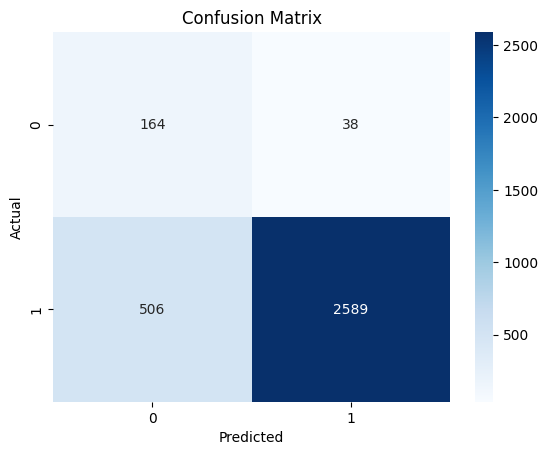

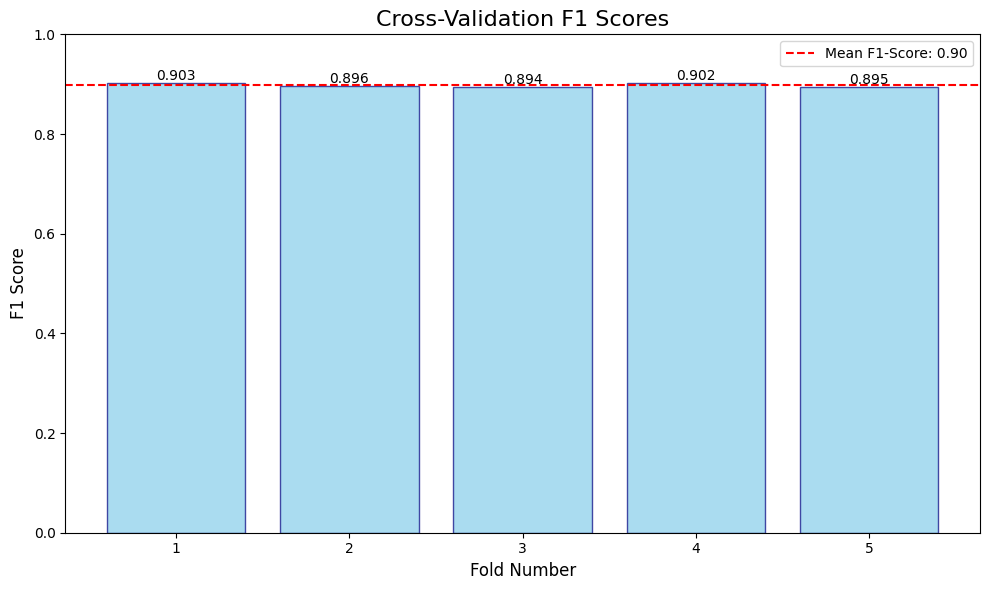

In [10]:
evaluateModel( logisticRegressionModel , X_test, y_test )

** F1-Score on Test Data: 0.92 **

** Classification Report: **
              precision    recall  f1-score   support

           0       0.27      0.70      0.39       202
           1       0.98      0.87      0.92      3095

    accuracy                           0.86      3297
   macro avg       0.62      0.79      0.65      3297
weighted avg       0.93      0.86      0.89      3297


** Confusion Matrix **


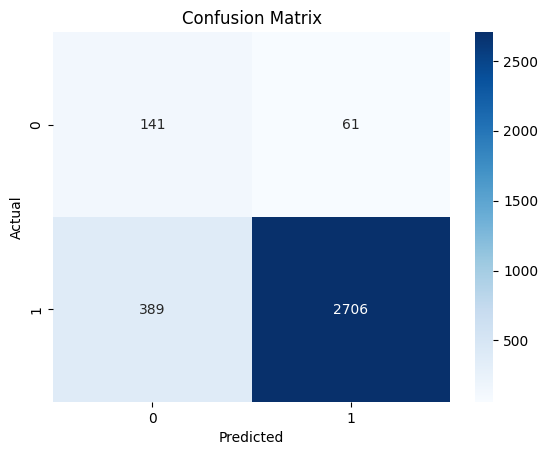

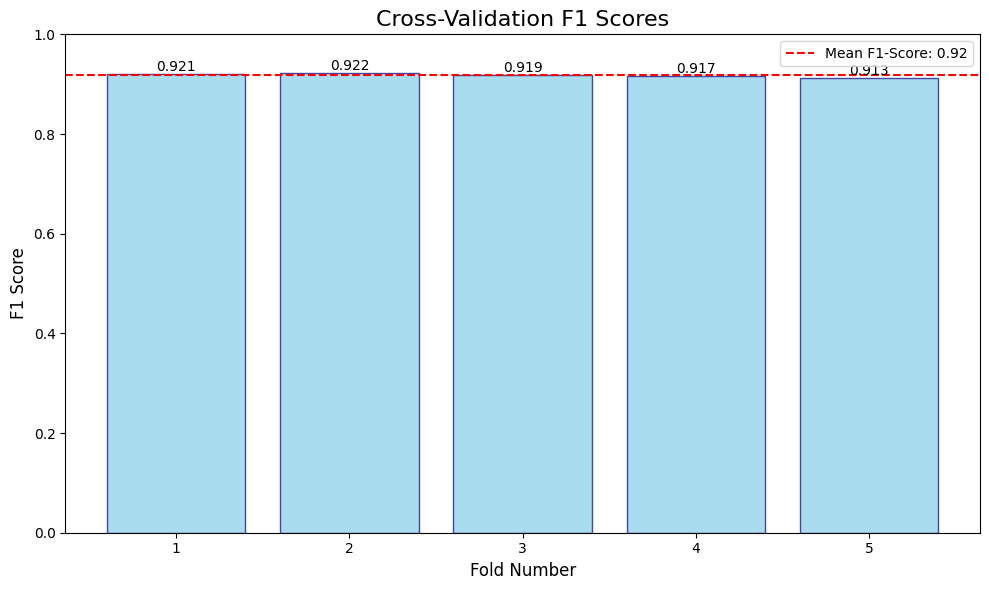

In [12]:
evaluateModel( lightGBMModel , X_test, y_test )

## Prediction on Sample Text

In [17]:
text = input("Enter Review for Sentiment Analysis: ")
predictSentiment( text , tfidfVectorizer, lightGBMModel )


Predicted Label: Negavtive
Probability of Positive Class: [0.04847809]



Top 40 Contributions for Text:
recipe: 4.357
see: 2.148
cant: 0.000


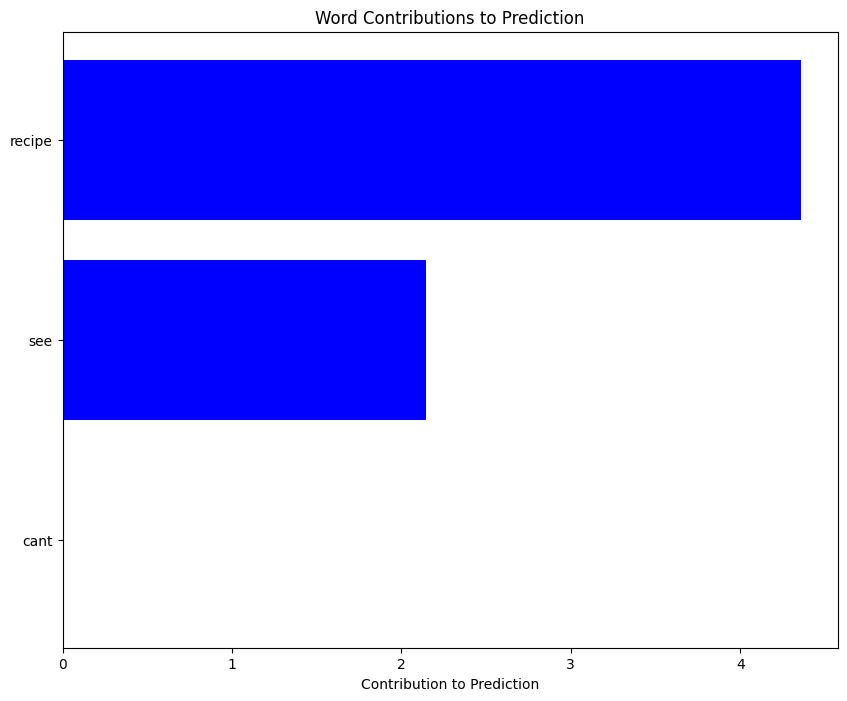

In [16]:
log_model = lightGBMModel.returnModel()
show_word_contributions(text, tfidfVectorizer, log_model, top_n=40)
